In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Datenimport

In [2]:
# path muss der Pfad zu deinen Daten von dem Verzeichnis dieser Datei aus sein
path = "DatenSchaabBabette-3.xlsx"
df = pd.read_excel(path)
df.shape

(58, 232)

In [2]:
# path muss der Pfad zu deinen Daten von dem Verzeichnis dieser Datei aus sein
path = "DatenSchaabBabette-5.xlsx"
df = pd.read_excel(path)
df.shape

(58, 232)

In [3]:
# 500ms pre-trigger Zeit abziehen
# ACHTUNG: Diese Zelle nur 1x ausführen
cols = df.columns.tolist()
lat_variables = [col for col in cols if "_Lat_" in col] # das sind die Latenz Spalten
for col in lat_variables:
    df[col] -= 500
print("DONE!")

DONE!


In [4]:
# ACHTUNG: HIER SOLLTE ~286 STEHEN, FALLS NICHT, WURDE DIE PRE-TRIGGER ZEIT FALSCH ABGEZOGEN
df[lat_variables].mean().mean()

286.58285440171954

In [4]:
patienten = df[df['Status '] == 1]
patienten.shape

(33, 232)

In [5]:
gesunde = df[df['Status '] == 0]
gesunde.shape

(21, 232)

In [6]:
gesunde

,Patientennummer,Status,Identifikation,Schwelle,Diskrimination,Sprays,16er,Alter,Geschlecht,Gewicht (kg),...,Suess_C3_Lat_p2,Suess_C3 _Amp_p2,Suess_C4_Lat_p2,Suess_C4_Amp_p2,Suess_P3_Lat_p2,Suess_P3_Amp_p2,Suess_P4_Lat_P2,Suess_P4_Amp_p2,Unnamed: 230,Bemerkung
33,208.0,0.0,12.0,NaN,NaN,5.0,11.0,86.0,1.0,69.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,209.0,0.0,15.0,NaN,NaN,5.0,11.0,56.0,1.0,54.0,...,814.0,368.0,819.0,-210.0,816.0,78.0,818.0,579.0,NaN,NaN
35,210.0,0.0,4.0,NaN,NaN,4.0,10.0,54.0,1.0,71.0,...,730.0,374.0,716.0,-1250.0,720.0,530.0,710.0,124.0,NaN,NaN
36,211.0,0.0,9.0,2.25,13.0,3.0,14.0,81.0,1.0,63.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,212.0,0.0,2.0,1.00,5.0,5.0,12.0,75.0,2.0,55.0,...,702.0,1999.0,703.0,870.0,701.0,676.0,703.0,-839.0,NaN,NaN
38,213.0,0.0,NaN,NaN,NaN,5.0,13.0,68.0,1.0,65.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,214.0,0.0,15.0,NaN,NaN,5.0,11.0,60.0,1.0,64.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,215.0,0.0,14.0,NaN,NaN,5.0,12.0,85.0,1.0,73.0,...,830.0,4307.0,821.0,1268.0,828.0,4768.0,823.0,2999.0,NaN,NaN
41,216.0,0.0,15.0,NaN,NaN,4.0,11.0,59.0,2.0,88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,217.0,0.0,14.0,NaN,NaN,5.0,12.0,83.0,2.0,69.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Hypothese 1: Patienten weisen unterschiedliche Latenzen für Stimuli auf
# Fazit: Keine signifikanten unterschiede in Latenzen

In [15]:
from scipy import stats

## Tests fuer Position Cz - Suess
Fazit: Keine Signifikanten Unterschiede in Latenzen zwischen Gesunden und Patienten

In [16]:
patienten_cz_sues_p1 = patienten[["Suess_Cz_Lat_P1", "Patientennummer"]].dropna() # dropna() wirft leere Zeilen raus
patienten_cz_sues_n1 = patienten[["Suess_Cz_Lat_N1", "Patientennummer"]].dropna()
patienten_cz_sues_p2 = patienten[["Suess_Cz_Lat_p2", "Patientennummer"]].dropna()

gesunde_cz_sues_p1 = gesunde[["Suess_Cz_Lat_P1", "Patientennummer"]].dropna() # dropna() wirft leere Zeilen raus
gesunde_cz_sues_n1 = gesunde[["Suess_Cz_Lat_N1", "Patientennummer"]].dropna()
gesunde_cz_sues_p2 = gesunde[["Suess_Cz_Lat_p2", "Patientennummer"]].dropna()

print(f"{len(patienten_cz_sues_p1)} Messungen vorhanden fuer patienten_cz_sues_p1")
print(f"{len(patienten_cz_sues_n1)} Messungen vorhanden fuer patienten_cz_sues_n1")
print(f"{len(patienten_cz_sues_p2)} Messungen vorhanden fuer patienten_cz_sues_p2")

print(f"{len(gesunde_cz_sues_p1)} Messungen vorhanden fuer gesunde_cz_sues_p1")
print(f"{len(gesunde_cz_sues_n1)} Messungen vorhanden fuer gesunde_cz_sues_n1")
print(f"{len(gesunde_cz_sues_p2)} Messungen vorhanden fuer gesunde_cz_sues_p2")

patienten_cz_sues_p1.drop(columns="Patientennummer", inplace=True)
patienten_cz_sues_n1.drop(columns="Patientennummer", inplace=True)
patienten_cz_sues_p2.drop(columns="Patientennummer", inplace=True)
gesunde_cz_sues_p1.drop(columns="Patientennummer", inplace=True)
gesunde_cz_sues_n1.drop(columns="Patientennummer", inplace=True)
gesunde_cz_sues_p2.drop(columns="Patientennummer", inplace=True)

16 Messungen vorhanden fuer patienten_cz_sues_p1
16 Messungen vorhanden fuer patienten_cz_sues_n1
16 Messungen vorhanden fuer patienten_cz_sues_p2
10 Messungen vorhanden fuer gesunde_cz_sues_p1
10 Messungen vorhanden fuer gesunde_cz_sues_n1
10 Messungen vorhanden fuer gesunde_cz_sues_p2


In [17]:
array_a = patienten_cz_sues_p1
array_b = gesunde_cz_sues_p1

result = stats.ttest_ind(array_a, array_b)
print("T-Test Statistics an der Stelle Cz fuer P1:")
result

T-Test Statistics an der Stelle Cz fuer P1:


Ttest_indResult(statistic=array([0.08740817]), pvalue=array([0.9310723]))

In [18]:
array_a = patienten_cz_sues_n1
array_b = gesunde_cz_sues_n1

result = stats.ttest_ind(array_a, array_b)
print("T-Test Statistics an der Stelle Cz fuer N1:")
result

T-Test Statistics an der Stelle Cz fuer N1:


Ttest_indResult(statistic=array([0.13508826]), pvalue=array([0.89366868]))

In [19]:
array_a = patienten_cz_sues_p2
array_b = gesunde_cz_sues_p2

result = stats.ttest_ind(array_a, array_b)
print("T-Test Statistics an der Stelle Cz fuer P2:")
result

T-Test Statistics an der Stelle Cz fuer P2:


Ttest_indResult(statistic=array([0.79957867]), pvalue=array([0.43179801]))

## Tests fuer Position Pz - Suess
Fazit: Keine Signifikanten Unterschiede in Latenzen zwischen Gesunden und Patienten

In [20]:
patienten_pz_sues_p1 = patienten[["Suess_Pz_Lat_P1", "Patientennummer"]].dropna() # dropna() wirft leere Zeilen raus
patienten_pz_sues_n1 = patienten[["Suess_Pz_Lat_N1", "Patientennummer"]].dropna()
patienten_pz_sues_p2 = patienten[["Suess_Pz_Lat_P2", "Patientennummer"]].dropna()

gesunde_pz_sues_p1 = gesunde[["Suess_Pz_Lat_P1", "Patientennummer"]].dropna() # dropna() wirft leere Zeilen raus
gesunde_pz_sues_n1 = gesunde[["Suess_Pz_Lat_N1", "Patientennummer"]].dropna()
gesunde_pz_sues_p2 = gesunde[["Suess_Pz_Lat_P2", "Patientennummer"]].dropna()

print(f"{len(patienten_pz_sues_p1)} Messungen vorhanden fuer patienten_pz_sues_p1")
print(f"{len(patienten_pz_sues_n1)} Messungen vorhanden fuer patienten_pz_sues_n1")
print(f"{len(patienten_pz_sues_p2)} Messungen vorhanden fuer patienten_pz_sues_p2")

print(f"{len(gesunde_pz_sues_p1)} Messungen vorhanden fuer gesunde_pz_sues_p1")
print(f"{len(gesunde_pz_sues_n1)} Messungen vorhanden fuer gesunde_pz_sues_n1")
print(f"{len(gesunde_pz_sues_p2)} Messungen vorhanden fuer gesunde_pz_sues_p2")

patienten_pz_sues_p1.drop(columns="Patientennummer", inplace=True)
patienten_pz_sues_n1.drop(columns="Patientennummer", inplace=True)
patienten_pz_sues_p2.drop(columns="Patientennummer", inplace=True)
gesunde_pz_sues_p1.drop(columns="Patientennummer", inplace=True)
gesunde_pz_sues_n1.drop(columns="Patientennummer", inplace=True)
gesunde_pz_sues_p2.drop(columns="Patientennummer", inplace=True)

16 Messungen vorhanden fuer patienten_pz_sues_p1
16 Messungen vorhanden fuer patienten_pz_sues_n1
16 Messungen vorhanden fuer patienten_pz_sues_p2
10 Messungen vorhanden fuer gesunde_pz_sues_p1
10 Messungen vorhanden fuer gesunde_pz_sues_n1
10 Messungen vorhanden fuer gesunde_pz_sues_p2


In [21]:
array_a = patienten_pz_sues_p1
array_b = gesunde_pz_sues_p1

result = stats.ttest_ind(array_a, array_b)
print("T-Test Statistics an der Stelle Pz fuer P1:")
result

T-Test Statistics an der Stelle Pz fuer P1:


Ttest_indResult(statistic=array([0.00489944]), pvalue=array([0.99613132]))

In [22]:
array_a = patienten_pz_sues_n1
array_b = gesunde_pz_sues_n1

result = stats.ttest_ind(array_a, array_b)
print("T-Test Statistics an der Stelle Pz fuer N1:")
result

T-Test Statistics an der Stelle Pz fuer N1:


Ttest_indResult(statistic=array([-0.0349541]), pvalue=array([0.97240544]))

In [23]:
array_a = patienten_pz_sues_p2
array_b = gesunde_pz_sues_p2

result = stats.ttest_ind(array_a, array_b)
print("T-Test Statistics an der Stelle Pz fuer P2:")
result

T-Test Statistics an der Stelle Pz fuer P2:


Ttest_indResult(statistic=array([0.86774174]), pvalue=array([0.3941297]))

## Tests fuer Position Fz - Suess
Fazit: Keine Signifikanten Unterschiede in Latenzen zwischen Gesunden und Patienten

In [24]:
patienten_fz_sues_p1 = patienten[["Suess_Fz_Lat_P1", "Patientennummer"]].dropna() # dropna() wirft leere Zeilen raus
patienten_fz_sues_n1 = patienten[["Suess_Fz_Lat_N1", "Patientennummer"]].dropna()
patienten_fz_sues_p2 = patienten[["Suess_Fz_Lat_P2", "Patientennummer"]].dropna()

gesunde_fz_sues_p1 = gesunde[["Suess_Fz_Lat_P1", "Patientennummer"]].dropna() # dropna() wirft leere Zeilen raus
gesunde_fz_sues_n1 = gesunde[["Suess_Fz_Lat_N1", "Patientennummer"]].dropna()
gesunde_fz_sues_p2 = gesunde[["Suess_Fz_Lat_P2", "Patientennummer"]].dropna()

print(f"{len(patienten_fz_sues_p1)} Messungen vorhanden fuer patienten_fz_sues_p1")
print(f"{len(patienten_fz_sues_n1)} Messungen vorhanden fuer patienten_fz_sues_n1")
print(f"{len(patienten_fz_sues_p2)} Messungen vorhanden fuer patienten_fz_sues_p2")

print(f"{len(gesunde_fz_sues_p1)} Messungen vorhanden fuer gesunde_fz_sues_p1")
print(f"{len(gesunde_fz_sues_n1)} Messungen vorhanden fuer gesunde_fz_sues_n1")
print(f"{len(gesunde_fz_sues_p2)} Messungen vorhanden fuer gesunde_fz_sues_p2")

patienten_fz_sues_p1.drop(columns="Patientennummer", inplace=True)
patienten_fz_sues_n1.drop(columns="Patientennummer", inplace=True)
patienten_fz_sues_p2.drop(columns="Patientennummer", inplace=True)
gesunde_fz_sues_p1.drop(columns="Patientennummer", inplace=True)
gesunde_fz_sues_n1.drop(columns="Patientennummer", inplace=True)
gesunde_fz_sues_p2.drop(columns="Patientennummer", inplace=True)

16 Messungen vorhanden fuer patienten_fz_sues_p1
16 Messungen vorhanden fuer patienten_fz_sues_n1
16 Messungen vorhanden fuer patienten_fz_sues_p2
9 Messungen vorhanden fuer gesunde_fz_sues_p1
9 Messungen vorhanden fuer gesunde_fz_sues_n1
9 Messungen vorhanden fuer gesunde_fz_sues_p2


In [25]:
array_a = patienten_fz_sues_p1
array_b = gesunde_fz_sues_p1

result = stats.ttest_ind(array_a, array_b)
print("T-Test Statistics an der Stelle Fz fuer P1:")
result

T-Test Statistics an der Stelle Fz fuer P1:


Ttest_indResult(statistic=array([-0.21211391]), pvalue=array([0.83388668]))

In [26]:
array_a = patienten_fz_sues_n1
array_b = gesunde_fz_sues_n1

result = stats.ttest_ind(array_a, array_b)
print("T-Test Statistics an der Stelle Fz fuer N1:")
result

T-Test Statistics an der Stelle Fz fuer N1:


Ttest_indResult(statistic=array([-0.2776235]), pvalue=array([0.7837816]))

In [27]:
array_a = patienten_fz_sues_p2
array_b = gesunde_fz_sues_p2

result = stats.ttest_ind(array_a, array_b)
print("T-Test Statistics an der Stelle Fz fuer P2:")
result

T-Test Statistics an der Stelle Fz fuer P2:


Ttest_indResult(statistic=array([0.43816346]), pvalue=array([0.66535553]))

## Tests fuer Position Cz - Salzig
Fazit: Keine Signifikanten Unterschiede in Latenzen zwischen Gesunden und Patienten

In [28]:
patienten_cz_salz_p1 = patienten[["Salz_Cz_Lat_P1", "Patientennummer"]].dropna() # dropna() wirft leere Zeilen raus
patienten_cz_salz_n1 = patienten[["Salz_Cz_Lat_N1", "Patientennummer"]].dropna()
patienten_cz_salz_p2 = patienten[["Salz_Cz_Lat_p2", "Patientennummer"]].dropna()

gesunde_cz_salz_p1 = gesunde[["Salz_Cz_Lat_P1", "Patientennummer"]].dropna() # dropna() wirft leere Zeilen raus
gesunde_cz_salz_n1 = gesunde[["Salz_Cz_Lat_N1", "Patientennummer"]].dropna()
gesunde_cz_salz_p2 = gesunde[["Salz_Cz_Lat_p2", "Patientennummer"]].dropna()

print(f"{len(patienten_cz_salz_p1)} Messungen vorhanden fuer patienten_cz_salz_p1")
print(f"{len(patienten_cz_salz_n1)} Messungen vorhanden fuer patienten_cz_salz_n1")
print(f"{len(patienten_cz_salz_p2)} Messungen vorhanden fuer patienten_cz_salz_p2")

print(f"{len(gesunde_cz_salz_p1)} Messungen vorhanden fuer gesunde_cz_salz_p1")
print(f"{len(gesunde_cz_salz_n1)} Messungen vorhanden fuer gesunde_cz_salz_n1")
print(f"{len(gesunde_cz_salz_p2)} Messungen vorhanden fuer gesunde_cz_salz_p2")

patienten_cz_salz_p1.drop(columns="Patientennummer", inplace=True)
patienten_cz_salz_n1.drop(columns="Patientennummer", inplace=True)
patienten_cz_salz_p2.drop(columns="Patientennummer", inplace=True)
gesunde_cz_salz_p1.drop(columns="Patientennummer", inplace=True)
gesunde_cz_salz_n1.drop(columns="Patientennummer", inplace=True)
gesunde_cz_salz_p2.drop(columns="Patientennummer", inplace=True)

23 Messungen vorhanden fuer patienten_cz_salz_p1
23 Messungen vorhanden fuer patienten_cz_salz_n1
23 Messungen vorhanden fuer patienten_cz_salz_p2
15 Messungen vorhanden fuer gesunde_cz_salz_p1
15 Messungen vorhanden fuer gesunde_cz_salz_n1
15 Messungen vorhanden fuer gesunde_cz_salz_p2


In [29]:
array_a = patienten_cz_salz_p1
array_b = gesunde_cz_salz_p1

result = stats.ttest_ind(array_a, array_b)
print("T-Test Statistics an der Stelle Cz fuer P1:")
result

T-Test Statistics an der Stelle Cz fuer P1:


Ttest_indResult(statistic=array([0.46893328]), pvalue=array([0.6419448]))

In [30]:
array_a = patienten_cz_salz_n1
array_b = gesunde_cz_salz_n1

result = stats.ttest_ind(array_a, array_b)
print("T-Test Statistics an der Stelle Cz fuer N1:")
result

T-Test Statistics an der Stelle Cz fuer N1:


Ttest_indResult(statistic=array([0.75290455]), pvalue=array([0.45640283]))

In [31]:
array_a = patienten_cz_salz_p2
array_b = gesunde_cz_salz_p2

result = stats.ttest_ind(array_a, array_b)
print("T-Test Statistics an der Stelle Cz fuer P2:")
result

T-Test Statistics an der Stelle Cz fuer P2:


Ttest_indResult(statistic=array([1.14342364]), pvalue=array([0.26040957]))

## Tests fuer Position Pz - Salzig
Fazit: Keine Signifikanten Unterschiede in Latenzen zwischen Gesunden und Patienten

In [22]:
patienten_pz_salz_p1 = patienten[["Salz_Pz_Lat_P1", "Patientennummer"]].dropna() # dropna() wirft leere Zeilen raus
patienten_pz_salz_n1 = patienten[["Salz_Pz_Lat_N1", "Patientennummer"]].dropna()
patienten_pz_salz_p2 = patienten[["Salz_Pz_Lat_P2", "Patientennummer"]].dropna()

gesunde_pz_salz_p1 = gesunde[["Salz_Pz_Lat_P1", "Patientennummer"]].dropna() # dropna() wirft leere Zeilen raus
gesunde_pz_salz_n1 = gesunde[["Salz_Pz_Lat_N1", "Patientennummer"]].dropna()
gesunde_pz_salz_p2 = gesunde[["Salz_Pz_Lat_P2", "Patientennummer"]].dropna()

print(f"{len(patienten_pz_salz_p1)} Messungen vorhanden fuer patienten_pz_salz_p1")
print(f"{len(patienten_pz_salz_n1)} Messungen vorhanden fuer patienten_pz_salz_n1")
print(f"{len(patienten_pz_salz_p2)} Messungen vorhanden fuer patienten_pz_salz_p2")

print(f"{len(gesunde_pz_salz_p1)} Messungen vorhanden fuer gesunde_pz_salz_p1")
print(f"{len(gesunde_pz_salz_n1)} Messungen vorhanden fuer gesunde_pz_salz_n1")
print(f"{len(gesunde_pz_salz_p2)} Messungen vorhanden fuer gesunde_pz_salz_p2")

patienten_pz_salz_p1.drop(columns="Patientennummer", inplace=True)
patienten_pz_salz_n1.drop(columns="Patientennummer", inplace=True)
patienten_pz_salz_p2.drop(columns="Patientennummer", inplace=True)
gesunde_pz_salz_p1.drop(columns="Patientennummer", inplace=True)
gesunde_pz_salz_n1.drop(columns="Patientennummer", inplace=True)
gesunde_pz_salz_p2.drop(columns="Patientennummer", inplace=True)

22 Messungen vorhanden fuer patienten_pz_salz_p1
22 Messungen vorhanden fuer patienten_pz_salz_n1
22 Messungen vorhanden fuer patienten_pz_salz_p2
15 Messungen vorhanden fuer gesunde_pz_salz_p1
15 Messungen vorhanden fuer gesunde_pz_salz_n1
15 Messungen vorhanden fuer gesunde_pz_salz_p2


In [23]:
array_a = patienten_pz_salz_p1
array_b = gesunde_pz_salz_p1

result = stats.ttest_ind(array_a, array_b)
print("T-Test Statistics an der Stelle Pz fuer P1:")
result

T-Test Statistics an der Stelle Pz fuer P1:


Ttest_indResult(statistic=array([0.70122063]), pvalue=array([0.48780175]))

In [24]:
array_a = patienten_pz_salz_n1
array_b = gesunde_pz_salz_n1

result = stats.ttest_ind(array_a, array_b)
print("T-Test Statistics an der Stelle Pz fuer N1:")
result

T-Test Statistics an der Stelle Pz fuer N1:


Ttest_indResult(statistic=array([1.02062178]), pvalue=array([0.31443689]))

In [25]:
array_a = patienten_pz_salz_p2
array_b = gesunde_pz_salz_p2

result = stats.ttest_ind(array_a, array_b)
print("T-Test Statistics an der Stelle Pz fuer P2:")
result

T-Test Statistics an der Stelle Pz fuer P2:


Ttest_indResult(statistic=array([1.45182281]), pvalue=array([0.15545663]))

## Tests fuer Position Fz - Salzig
Fazit: Keine Signifikanten Unterschiede in Latenzen zwischen Gesunden und Patienten

In [26]:
patienten_fz_salz_p1 = patienten[["Salz_Fz_Lat_P1", "Patientennummer"]].dropna() # dropna() wirft leere Zeilen raus
patienten_fz_salz_n1 = patienten[["Salz_Fz_Lat_N1", "Patientennummer"]].dropna()
patienten_fz_salz_p2 = patienten[["Salz_Fz_Lat_P2", "Patientennummer"]].dropna()

gesunde_fz_salz_p1 = gesunde[["Salz_Fz_Lat_P1", "Patientennummer"]].dropna() # dropna() wirft leere Zeilen raus
gesunde_fz_salz_n1 = gesunde[["Salz_Fz_Lat_N1", "Patientennummer"]].dropna()
gesunde_fz_salz_p2 = gesunde[["Salz_Fz_Lat_P2", "Patientennummer"]].dropna()

print(f"{len(patienten_fz_salz_p1)} Messungen vorhanden fuer patienten_fz_salz_p1")
print(f"{len(patienten_fz_salz_n1)} Messungen vorhanden fuer patienten_fz_salz_n1")
print(f"{len(patienten_fz_salz_p2)} Messungen vorhanden fuer patienten_fz_salz_p2")

print(f"{len(gesunde_fz_salz_p1)} Messungen vorhanden fuer gesunde_fz_salz_p1")
print(f"{len(gesunde_fz_salz_n1)} Messungen vorhanden fuer gesunde_fz_salz_n1")
print(f"{len(gesunde_fz_salz_p2)} Messungen vorhanden fuer gesunde_fz_salz_p2")

patienten_fz_salz_p1.drop(columns="Patientennummer", inplace=True)
patienten_fz_salz_n1.drop(columns="Patientennummer", inplace=True)
patienten_fz_salz_p2.drop(columns="Patientennummer", inplace=True)
gesunde_fz_salz_p1.drop(columns="Patientennummer", inplace=True)
gesunde_fz_salz_n1.drop(columns="Patientennummer", inplace=True)
gesunde_fz_salz_p2.drop(columns="Patientennummer", inplace=True)

23 Messungen vorhanden fuer patienten_fz_salz_p1
23 Messungen vorhanden fuer patienten_fz_salz_n1
22 Messungen vorhanden fuer patienten_fz_salz_p2
15 Messungen vorhanden fuer gesunde_fz_salz_p1
15 Messungen vorhanden fuer gesunde_fz_salz_n1
15 Messungen vorhanden fuer gesunde_fz_salz_p2


In [27]:
array_a = patienten_fz_salz_p1
array_b = gesunde_fz_salz_p1

result = stats.ttest_ind(array_a, array_b)
print("T-Test Statistics an der Stelle Fz fuer P1:")
result

T-Test Statistics an der Stelle Fz fuer P1:


Ttest_indResult(statistic=array([0.69920471]), pvalue=array([0.48891735]))

In [28]:
array_a = patienten_fz_salz_n1
array_b = gesunde_fz_salz_n1

result = stats.ttest_ind(array_a, array_b)
print("T-Test Statistics an der Stelle Fz fuer N1:")
result

T-Test Statistics an der Stelle Fz fuer N1:


Ttest_indResult(statistic=array([1.07507469]), pvalue=array([0.28949411]))

In [29]:
array_a = patienten_fz_salz_p2
array_b = gesunde_fz_salz_p2

result = stats.ttest_ind(array_a, array_b)
print("T-Test Statistics an der Stelle Fz fuer P2:")
result

T-Test Statistics an der Stelle Fz fuer P2:


Ttest_indResult(statistic=array([1.44308583]), pvalue=array([0.15788728]))

## Um etwaige Tendenzen zu erkennen, koennen wir uns noch anschauen wir einige allgemeine Kenngroesen der Daten so aussehen

In [30]:
columns = ["Salz_Cz_Lat_P1", "Salz_Cz_Lat_N1", "Salz_Cz_Lat_p2" ,"Salz_Pz_Lat_P1", "Salz_Pz_Lat_N1", "Salz_Pz_Lat_P2", "Salz_Fz_Lat_P1", "Salz_Fz_Lat_N1", "Salz_Fz_Lat_P2"]
patienten[columns].dropna().describe()

,Salz_Cz_Lat_P1,Salz_Cz_Lat_N1,Salz_Cz_Lat_p2,Salz_Pz_Lat_P1,Salz_Pz_Lat_N1,Salz_Pz_Lat_P2,Salz_Fz_Lat_P1,Salz_Fz_Lat_N1,Salz_Fz_Lat_P2
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,744.428571,794.428571,886.952381,749.000000,799.523810,892.857143,750.142857,806.952381,905.333333
std,80.164563,92.761830,113.886556,78.848589,89.302082,112.166522,79.048267,92.377744,123.352476
min,614.000000,642.000000,698.000000,615.000000,642.000000,699.000000,614.000000,646.000000,698.000000
25%,682.000000,712.000000,814.000000,697.000000,727.000000,828.000000,699.000000,726.000000,826.000000
50%,719.000000,768.000000,861.000000,765.000000,816.000000,866.000000,761.000000,842.000000,888.000000
75%,821.000000,884.000000,995.000000,819.000000,879.000000,999.000000,816.000000,882.000000,1002.000000
max,885.000000,958.000000,1137.000000,888.000000,958.000000,1141.000000,888.000000,958.000000,1151.000000


In [31]:
columns = ["Salz_Cz_Lat_P1", "Salz_Cz_Lat_N1", "Salz_Cz_Lat_p2" ,"Salz_Pz_Lat_P1", "Salz_Pz_Lat_N1", "Salz_Pz_Lat_P2", "Salz_Fz_Lat_P1", "Salz_Fz_Lat_N1", "Salz_Fz_Lat_P2"]
gesunde[columns].dropna().describe()

,Salz_Cz_Lat_P1,Salz_Cz_Lat_N1,Salz_Cz_Lat_p2,Salz_Pz_Lat_P1,Salz_Pz_Lat_N1,Salz_Pz_Lat_P2,Salz_Fz_Lat_P1,Salz_Fz_Lat_N1,Salz_Fz_Lat_P2
count,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000
mean,729.666667,770.200000,843.40000,730.466667,771.466667,843.000000,729.000000,771.400000,843.80000
std,88.321383,88.657608,89.34028,88.141013,88.239015,89.315652,89.163574,91.790756,89.53467
min,634.000000,670.000000,719.00000,634.000000,669.000000,721.000000,631.000000,671.000000,720.00000
25%,658.000000,691.500000,779.00000,659.500000,691.000000,776.500000,656.500000,690.500000,782.00000
50%,691.000000,765.000000,847.00000,694.000000,768.000000,845.000000,689.000000,766.000000,843.00000
75%,778.000000,819.000000,881.00000,779.500000,818.500000,883.000000,777.500000,821.000000,881.50000
max,916.000000,932.000000,1026.00000,917.000000,932.000000,1028.000000,918.000000,951.000000,1031.00000


In [32]:
columns = ["Salz_Cz_Lat_P1", "Salz_Cz_Lat_N1", "Salz_Cz_Lat_p2" ,"Salz_Pz_Lat_P1", "Salz_Pz_Lat_N1", "Salz_Pz_Lat_P2", "Salz_Fz_Lat_P1", "Salz_Fz_Lat_N1", "Salz_Fz_Lat_P2"]
columns = [item.replace("Salz", "Suess") for item in columns]
patienten[columns].dropna().describe()

,Suess_Cz_Lat_P1,Suess_Cz_Lat_N1,Suess_Cz_Lat_p2,Suess_Pz_Lat_P1,Suess_Pz_Lat_N1,Suess_Pz_Lat_P2,Suess_Fz_Lat_P1,Suess_Fz_Lat_N1,Suess_Fz_Lat_P2
count,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000,16.000000,16.00000
mean,707.937500,763.250000,853.875000,709.75000,759.437500,856.062500,708.625000,765.125000,850.00000
std,72.350507,72.314591,95.378457,70.45424,71.402118,96.440979,71.157923,72.421797,98.26427
min,601.000000,657.000000,703.000000,603.00000,656.000000,701.000000,605.000000,656.000000,706.00000
25%,661.500000,724.000000,802.500000,664.00000,722.750000,802.750000,663.750000,723.500000,788.75000
50%,693.000000,747.500000,840.500000,690.00000,740.000000,848.000000,692.000000,744.000000,832.50000
75%,752.750000,832.250000,905.750000,755.75000,827.250000,910.500000,753.000000,832.250000,908.50000
max,852.000000,884.000000,1017.000000,852.00000,883.000000,1020.000000,850.000000,883.000000,1023.00000


In [33]:
columns = ["Salz_Cz_Lat_P1", "Salz_Cz_Lat_N1", "Salz_Cz_Lat_p2" ,"Salz_Pz_Lat_P1", "Salz_Pz_Lat_N1", "Salz_Pz_Lat_P2", "Salz_Fz_Lat_P1", "Salz_Fz_Lat_N1", "Salz_Fz_Lat_P2"]
columns = [item.replace("Salz", "Suess") for item in columns]
gesunde[columns].dropna().describe()

,Suess_Cz_Lat_P1,Suess_Cz_Lat_N1,Suess_Cz_Lat_p2,Suess_Pz_Lat_P1,Suess_Pz_Lat_N1,Suess_Pz_Lat_P2,Suess_Fz_Lat_P1,Suess_Fz_Lat_N1,Suess_Fz_Lat_P2
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,714.777778,772.444444,836.111111,718.666667,773.222222,834.777778,715.333333,773.555556,833.444444
std,85.212643,74.931821,67.138745,84.098157,75.352136,66.069618,84.080319,73.732813,74.409527
min,593.000000,680.000000,734.000000,601.000000,683.000000,733.000000,593.000000,682.000000,702.000000
25%,641.000000,694.000000,803.000000,647.000000,692.000000,798.000000,651.000000,696.000000,801.000000
50%,724.000000,777.000000,828.000000,724.000000,786.000000,828.000000,724.000000,779.000000,828.000000
75%,761.000000,799.000000,866.000000,760.000000,803.000000,864.000000,761.000000,796.000000,865.000000
max,856.000000,903.000000,953.000000,856.000000,903.000000,948.000000,854.000000,900.000000,956.000000


# Hypothese 2: Patienten weisen unterschiedliche Amplituden für Stimuli auf

In [5]:
from scipy import stats

In [6]:
# Wir sehen: Amplitudenmessungen liegen Groessenordnungen auseinander fuer unterschiedliche Probanden - schlecht
df[['Suess_Fz_Amp_P1', 'Suess_Fz_Amp_N1', 'Suess_Fz_Amp_p2']].dropna()

,Suess_Fz_Amp_P1,Suess_Fz_Amp_N1,Suess_Fz_Amp_p2
0,4029.0,-32.0,6623.0
1,1558.0,-3617.0,3852.0
2,-866.0,-9133.0,-1466.0
3,-3000.0,-4324.0,4295.0
5,356.0,-4999.0,7498.0
7,-1930.0,-3413.0,724.0
13,-10928.0,-15643.0,2784.0
14,2159.0,-279.0,2800.0
16,948.0,-3051.0,1153.0
17,-1592.0,-1274.0,-7728.0


In [7]:
patienten[['Suess_Fz_Amp_P1', 'Suess_Fz_Amp_N1', 'Suess_Fz_Amp_p2']].dropna()

,Suess_Fz_Amp_P1,Suess_Fz_Amp_N1,Suess_Fz_Amp_p2
0,4029.0,-32.0,6623.0
1,1558.0,-3617.0,3852.0
2,-866.0,-9133.0,-1466.0
3,-3000.0,-4324.0,4295.0
5,356.0,-4999.0,7498.0
7,-1930.0,-3413.0,724.0
13,-10928.0,-15643.0,2784.0
14,2159.0,-279.0,2800.0
16,948.0,-3051.0,1153.0
17,-1592.0,-1274.0,-7728.0


In [15]:
gesunde[['Suess_Fz_Amp_P1', 'Suess_Fz_Amp_N1', 'Suess_Fz_Amp_p2']].dropna()

,Suess_Fz_Amp_P1,Suess_Fz_Amp_N1,Suess_Fz_Amp_p2
34,-2762.0,-7499.0,-2289.0
37,2934.0,-5580.0,2193.0
40,-1846.0,-4615.0,76.0
43,-654.0,-5076.0,3268.0
46,2142.0,-600.0,4913.0
47,1208.0,-3166.0,-666.0
48,3927.0,-1857.0,3213.0
51,-3045.0,-5928.0,-2928.0
53,-128226.0,-131189.0,-126068.0


### Zwischenbeobachtung: Amplituden der Patienten haben deutlich stärkere Schwankungen / Standardabweichungen

In [14]:
# Wie sieht denn die Standardabweichung aus?
patienten[['Suess_Fz_Amp_P1', 'Suess_Fz_Amp_N1', 'Suess_Fz_Amp_p2']].std()

Suess_Fz_Amp_P1    1.874511e+07
Suess_Fz_Amp_N1    1.997018e+07
Suess_Fz_Amp_p2    1.897516e+07
dtype: float64

In [16]:
gesunde[['Suess_Fz_Amp_P1', 'Suess_Fz_Amp_N1', 'Suess_Fz_Amp_p2']].std()

Suess_Fz_Amp_P1    42894.773530
Suess_Fz_Amp_N1    42353.030311
Suess_Fz_Amp_p2    42430.355208
dtype: float64

In [17]:
patienten[['Suess_Cz_Amp_P1', 'Suess_Cz_Amp_N1', 'Suess_Cz_Amp_p2']].std()

Suess_Cz_Amp_P1    4.017000e+06
Suess_Cz_Amp_N1    3.329845e+07
Suess_Cz_Amp_p2    3.082547e+08
dtype: float64

In [18]:
gesunde[['Suess_Cz_Amp_P1', 'Suess_Cz_Amp_N1', 'Suess_Cz_Amp_p2']].std()

Suess_Cz_Amp_P1    39670.260393
Suess_Cz_Amp_N1    38730.521129
Suess_Cz_Amp_p2    39134.575686
dtype: float64

In [19]:
patienten[['Suess_Pz_Amp_P1', 'Suess_Pz_Amp_N1', 'Suess_Pz_Amp_p2']].std()

Suess_Pz_Amp_P1    4.837415e+08
Suess_Pz_Amp_N1    2.719501e+08
Suess_Pz_Amp_p2    2.722062e+08
dtype: float64

In [20]:
gesunde[['Suess_Pz_Amp_P1', 'Suess_Pz_Amp_N1', 'Suess_Pz_Amp_p2']].std()

Suess_Pz_Amp_P1    35933.799280
Suess_Pz_Amp_N1    34905.110859
Suess_Pz_Amp_p2    35674.055961
dtype: float64

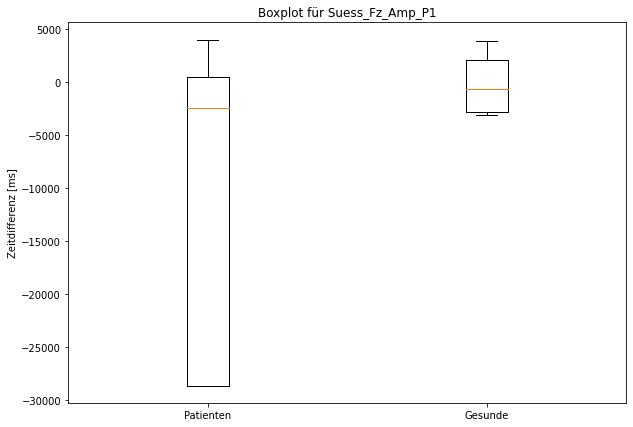

In [13]:
# Dieser Plot ist mit Vorsicht zu genießen, da wir den automatischen Ausreißer-Filter von Matplotlib verwenden
variable = "Suess_Fz_Amp_P1"
array_a = patienten[variable].dropna()
array_b = gesunde[variable].dropna()
fig = plt.figure(figsize =(10, 7))
plt.boxplot([array_a, array_b], showfliers=False)
plt.title(f"Boxplot für {variable}")
plt.ylabel('Zeitdifferenz [ms]')
plt.xticks([1, 2], ['Patienten', 'Gesunde'])
plt.show()

In [32]:
# Nun berechnen wir die ABSOLUTEN Amplitudendifferenzen fuer alle Probanden
df['Suess_Fz_Amp_P1_minus_N1'] = (df['Suess_Fz_Amp_P1'] - df['Suess_Fz_Amp_N1']).abs()
df['Suess_Fz_Amp_N1_minus_P2'] = (df['Suess_Fz_Amp_N1'] - df['Suess_Fz_Amp_p2']).abs()
df['Suess_Cz_Amp_P1_minus_N1'] = (df['Suess_Cz_Amp_P1'] - df['Suess_Cz_Amp_N1']).abs()
df['Suess_Cz_Amp_N1_minus_P2'] = (df['Suess_Cz_Amp_N1'] - df['Suess_Cz_Amp_p2']).abs()
df['Suess_Pz_Amp_P1_minus_N1'] = (df['Suess_Pz_Amp_P1'] - df['Suess_Pz_Amp_N1']).abs()
df['Suess_Pz_Amp_N1_minus_P2'] = (df['Suess_Pz_Amp_N1'] - df['Suess_Pz_Amp_p2']).abs()

df['Salz_Fz_Amp_P1_minus_N1'] = (df['Salz_Fz_Amp_P1'] - df['Salz_Fz_Amp_N1']).abs()
df['Salz_Fz_Amp_N1_minus_P2'] = (df['Salz_Fz_Amp_N1'] - df['Salz_Fz_Amp_p2']).abs()
df['Salz_Cz_Amp_P1_minus_N1'] = (df['Salz_Cz_Amp_P1'] - df['Salz_Cz_Amp_N1']).abs()
df['Salz_Cz_Amp_N1_minus_P2'] = (df['Salz_Cz_Amp_N1'] - df['Salz_Cz_Amp_p2']).abs()
df['Salz_Pz_Amp_P1_minus_N1'] = (df['Salz_Pz_Amp_P1'] - df['Salz_Pz_Amp_N1']).abs()
df['Salz_Pz_Amp_N1_minus_P2'] = (df['Salz_Pz_Amp_N1'] - df['Salz_Pz_Amp_p2']).abs()

In [33]:
columns = ['Status ', "Patientennummer", "Suess_Fz_Amp_P1", "Suess_Fz_Amp_N1", "Suess_Fz_Amp_p2","Suess_Fz_Amp_P1_minus_N1", 
            "Suess_Fz_Amp_N1_minus_P2", "Suess_Cz_Amp_P1", "Suess_Cz_Amp_N1", "Suess_Cz_Amp_p2",
            "Suess_Cz_Amp_P1_minus_N1", "Suess_Cz_Amp_N1_minus_P2", "Suess_Pz_Amp_P1", "Suess_Pz_Amp_N1",
            "Suess_Pz_Amp_p2", "Suess_Pz_Amp_P1_minus_N1", "Suess_Pz_Amp_N1_minus_P2",
           "Salz_Fz_Amp_P1", "Salz_Fz_Amp_N1", "Salz_Fz_Amp_p2", "Salz_Fz_Amp_P1_minus_N1",
            "Salz_Fz_Amp_N1_minus_P2", "Salz_Cz_Amp_P1", "Salz_Cz_Amp_N1", "Salz_Cz_Amp_p2",
           "Salz_Cz_Amp_P1_minus_N1", "Salz_Cz_Amp_N1_minus_P2", "Salz_Pz_Amp_P1", "Salz_Pz_Amp_N1",
           "Salz_Pz_Amp_p2", "Salz_Pz_Amp_P1_minus_N1", "Salz_Pz_Amp_N1_minus_P2"]
df[columns].dropna(thresh=10).reset_index(drop=True).to_csv("Amplituden.csv")

In [34]:
# Sieht gut aus so
df[["Suess_Fz_Amp_P1_minus_N1", "Suess_Fz_Amp_N1_minus_P2"]].dropna()

,Suess_Fz_Amp_P1_minus_N1,Suess_Fz_Amp_N1_minus_P2
0,4061.0,6655.0
1,5175.0,7469.0
2,8267.0,7667.0
3,1324.0,8619.0
5,5355.0,12497.0
7,1483.0,4137.0
13,4715.0,18427.0
14,2438.0,3079.0
16,3999.0,4204.0
17,318.0,6454.0


In [39]:
# Fuer die Ausreisser brauchen wir noch einen Filter
# Dafür werfen wir einfach mal alle Werte raus, deren absoluter Wert mindestens 50x grösser ist als der Median 
import numpy as np
def filter_outliers(series):
    """
    Takes pd.Series as input and returns a python list of filtered values.
    """
    median = series.median()
    values = series.tolist()
    filtered_values = [value for value in values if abs(value) < 50 * abs(median)]
    removed_values = [value for value in values if value not in filtered_values]
    print(f"Removed {removed_values}, filter median was {median}")
    return filtered_values

def mean(values):
    return sum(values) / len(values)

In [11]:
# Jetzt schauen wir uns unterschiede zwischen patienten/gesunden an
gesunde = df[df['Status '] == 0]
patienten = df[df['Status '] == 1]
print("Patienten Dataframe:", patienten.shape)
print("Gesunden Dataframe:", gesunde.shape)

Patienten Dataframe: (33, 244)
Gesunden Dataframe: (21, 244)


## T-tests fuer suess

In [26]:
variable = "Suess_Fz_Amp_P1_minus_N1"
array_a = patienten[variable].dropna()
array_b = gesunde[variable].dropna()
print(f"{len(array_a)} Patienten übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print(f"{len(array_b)} Gesunde übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print()
array_a = filter_outliers(array_a)
array_b = filter_outliers(array_b)
print(f"{len(array_a)} Patienten übrig nach dem Ausreißer Filter für {variable}.")
print(f"{len(array_b)} Gesunde übrig nach dem Ausreißer Filter für {variable}.")
print()

print(f"T-Test statistics for {variable} for the folowing means:")
print(f'Patienten: {mean(array_a)}')
print(f'Gesunde: {mean(array_b)}')

result = stats.ttest_ind(array_a, array_b)
result

16 Patienten übrig nachdem auf fehlende Werte für Suess_Fz_Amp_P1_minus_N1 korrigiert wurde.
9 Gesunde übrig nachdem auf fehlende Werte für Suess_Fz_Amp_P1_minus_N1 korrigiert wurde.

Removed [4904000.0], filter median was 3701.5
Removed [], filter median was 4374.0
15 Patienten übrig nach dem Ausreißer Filter für Suess_Fz_Amp_P1_minus_N1.
9 Gesunde übrig nach dem Ausreißer Filter für Suess_Fz_Amp_P1_minus_N1.

T-Test statistics for Suess_Fz_Amp_P1_minus_N1 for the folowing means:
Patienten: 3744.8
Gesunde: 4354.222222222223


Ttest_indResult(statistic=-0.6687216201399151, pvalue=0.510629663541722)

In [27]:
variable = "Suess_Fz_Amp_N1_minus_P2"
array_a = patienten[variable].dropna()
array_b = gesunde[variable].dropna()
print(f"{len(array_a)} Patienten übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print(f"{len(array_b)} Gesunde übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print()
array_a = filter_outliers(array_a)
array_b = filter_outliers(array_b)
print(f"{len(array_a)} Patienten übrig nach dem Ausreißer Filter für {variable}.")
print(f"{len(array_b)} Gesunde übrig nach dem Ausreißer Filter für {variable}.")
print()

print(f"T-Test statistics for {variable} for the folowing means:")
print(f'Patienten: {mean(array_a)}')
print(f'Gesunde: {mean(array_b)}')

result = stats.ttest_ind(array_a, array_b)
result

16 Patienten übrig nachdem auf fehlende Werte für Suess_Fz_Amp_N1_minus_P2 korrigiert wurde.
9 Gesunde übrig nachdem auf fehlende Werte für Suess_Fz_Amp_N1_minus_P2 korrigiert wurde.

Removed [3986000.0], filter median was 6482.5
Removed [], filter median was 5121.0
15 Patienten übrig nach dem Ausreißer Filter für Suess_Fz_Amp_N1_minus_P2.
9 Gesunde übrig nach dem Ausreißer Filter für Suess_Fz_Amp_N1_minus_P2.

T-Test statistics for Suess_Fz_Amp_N1_minus_P2 for the folowing means:
Patienten: 6753.2
Gesunde: 5246.888888888889


Ttest_indResult(statistic=1.0034452653181978, pvalue=0.3265559481791499)

In [28]:
variable = "Suess_Cz_Amp_P1_minus_N1"
array_a = patienten[variable].dropna()
array_b = gesunde[variable].dropna()
print(f"{len(array_a)} Patienten übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print(f"{len(array_b)} Gesunde übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print()
array_a = filter_outliers(array_a)
array_b = filter_outliers(array_b)
print(f"{len(array_a)} Patienten übrig nach dem Ausreißer Filter für {variable}.")
print(f"{len(array_b)} Gesunde übrig nach dem Ausreißer Filter für {variable}.")
print()

print(f"T-Test statistics for {variable} for the folowing means:")
print(f'Patienten: {mean(array_a)}')
print(f'Gesunde: {mean(array_b)}')

result = stats.ttest_ind(array_a, array_b)
result

15 Patienten übrig nachdem auf fehlende Werte für Suess_Cz_Amp_P1_minus_N1 korrigiert wurde.
10 Gesunde übrig nachdem auf fehlende Werte für Suess_Cz_Amp_P1_minus_N1 korrigiert wurde.

Removed [4603000.0], filter median was 3593.0
Removed [], filter median was 3377.5
14 Patienten übrig nach dem Ausreißer Filter für Suess_Cz_Amp_P1_minus_N1.
10 Gesunde übrig nach dem Ausreißer Filter für Suess_Cz_Amp_P1_minus_N1.

T-Test statistics for Suess_Cz_Amp_P1_minus_N1 for the folowing means:
Patienten: 4430.142857142857
Gesunde: 3842.7


Ttest_indResult(statistic=0.5969503332496935, pvalue=0.5566347324374382)

In [29]:
variable = "Suess_Cz_Amp_N1_minus_P2"
array_a = patienten[variable].dropna()
array_b = gesunde[variable].dropna()
print(f"{len(array_a)} Patienten übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print(f"{len(array_b)} Gesunde übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print()
array_a = filter_outliers(array_a)
array_b = filter_outliers(array_b)
print(f"{len(array_a)} Patienten übrig nach dem Ausreißer Filter für {variable}.")
print(f"{len(array_b)} Gesunde übrig nach dem Ausreißer Filter für {variable}.")
print()

print(f"T-Test statistics for {variable} for the folowing means:")
print(f'Patienten: {mean(array_a)}')
print(f'Gesunde: {mean(array_b)}')

result = stats.ttest_ind(array_a, array_b)
result

16 Patienten übrig nachdem auf fehlende Werte für Suess_Cz_Amp_N1_minus_P2 korrigiert wurde.
10 Gesunde übrig nachdem auf fehlende Werte für Suess_Cz_Amp_N1_minus_P2 korrigiert wurde.

Removed [1100902889.0, 5305000.0], filter median was 6473.0
Removed [], filter median was 5055.0
14 Patienten übrig nach dem Ausreißer Filter für Suess_Cz_Amp_N1_minus_P2.
10 Gesunde übrig nach dem Ausreißer Filter für Suess_Cz_Amp_N1_minus_P2.

T-Test statistics for Suess_Cz_Amp_N1_minus_P2 for the folowing means:
Patienten: 6687.571428571428
Gesunde: 4727.5


Ttest_indResult(statistic=1.731058021286538, pvalue=0.09744437848626421)

In [30]:
variable = "Suess_Pz_Amp_P1_minus_N1"
array_a = patienten[variable].dropna()
array_b = gesunde[variable].dropna()
print(f"{len(array_a)} Patienten übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print(f"{len(array_b)} Gesunde übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print()
array_a = filter_outliers(array_a)
array_b = filter_outliers(array_b)
print(f"{len(array_a)} Patienten übrig nach dem Ausreißer Filter für {variable}.")
print(f"{len(array_b)} Gesunde übrig nach dem Ausreißer Filter für {variable}.")
print()

print(f"T-Test statistics for {variable} for the folowing means:")
print(f'Patienten: {mean(array_a)}')
print(f'Gesunde: {mean(array_b)}')

result = stats.ttest_ind(array_a, array_b)
result

16 Patienten übrig nachdem auf fehlende Werte für Suess_Pz_Amp_P1_minus_N1 korrigiert wurde.
10 Gesunde übrig nachdem auf fehlende Werte für Suess_Pz_Amp_P1_minus_N1 korrigiert wurde.

Removed [6292999.0, 3018935593.0, 5180000.0], filter median was 3448.0
Removed [], filter median was 3268.5
13 Patienten übrig nach dem Ausreißer Filter für Suess_Pz_Amp_P1_minus_N1.
10 Gesunde übrig nach dem Ausreißer Filter für Suess_Pz_Amp_P1_minus_N1.

T-Test statistics for Suess_Pz_Amp_P1_minus_N1 for the folowing means:
Patienten: 4227.2307692307695
Gesunde: 3474.4


Ttest_indResult(statistic=0.6668228040962013, pvalue=0.5121460265196955)

In [31]:
variable = "Suess_Pz_Amp_N1_minus_P2"
array_a = patienten[variable].dropna()
array_b = gesunde[variable].dropna()
print(f"{len(array_a)} Patienten übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print(f"{len(array_b)} Gesunde übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print()
array_a = filter_outliers(array_a)
array_b = filter_outliers(array_b)
print(f"{len(array_a)} Patienten übrig nach dem Ausreißer Filter für {variable}.")
print(f"{len(array_b)} Gesunde übrig nach dem Ausreißer Filter für {variable}.")
print()

print(f"T-Test statistics for {variable} for the folowing means:")
print(f'Patienten: {mean(array_a)}')
print(f'Gesunde: {mean(array_b)}')

result = stats.ttest_ind(array_a, array_b)
result

16 Patienten übrig nachdem auf fehlende Werte für Suess_Pz_Amp_N1_minus_P2 korrigiert wurde.
10 Gesunde übrig nachdem auf fehlende Werte für Suess_Pz_Amp_N1_minus_P2 korrigiert wurde.

Removed [7645999.0, 2171902889.0, 6294000.0], filter median was 6160.5
Removed [], filter median was 4412.5
13 Patienten übrig nach dem Ausreißer Filter für Suess_Pz_Amp_N1_minus_P2.
10 Gesunde übrig nach dem Ausreißer Filter für Suess_Pz_Amp_N1_minus_P2.

T-Test statistics for Suess_Pz_Amp_N1_minus_P2 for the folowing means:
Patienten: 6285.923076923077
Gesunde: 4526.5


Ttest_indResult(statistic=1.3544844342248277, pvalue=0.18997722473041478)

## T-tests fuer salzig

In [32]:
variable = "Salz_Fz_Amp_P1_minus_N1"
array_a = patienten[variable].dropna()
array_b = gesunde[variable].dropna()
print(f"{len(array_a)} Patienten übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print(f"{len(array_b)} Gesunde übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print()
array_a = filter_outliers(array_a)
array_b = filter_outliers(array_b)
print(f"{len(array_a)} Patienten übrig nach dem Ausreißer Filter für {variable}.")
print(f"{len(array_b)} Gesunde übrig nach dem Ausreißer Filter für {variable}.")
print()

print(f"T-Test statistics for {variable} for the folowing means:")
print(f'Patienten: {mean(array_a)}')
print(f'Gesunde: {mean(array_b)}')

result = stats.ttest_ind(array_a, array_b)
result

23 Patienten übrig nachdem auf fehlende Werte für Salz_Fz_Amp_P1_minus_N1 korrigiert wurde.
15 Gesunde übrig nachdem auf fehlende Werte für Salz_Fz_Amp_P1_minus_N1 korrigiert wurde.

Removed [1811000.0, 1559999.0, 1050901888.0, 578031703.0, 3741000.0], filter median was 4450.0
Removed [2391999.0, 1766968297.0, 2500000.0, 8651000.0], filter median was 6749.0
18 Patienten übrig nach dem Ausreißer Filter für Salz_Fz_Amp_P1_minus_N1.
11 Gesunde übrig nach dem Ausreißer Filter für Salz_Fz_Amp_P1_minus_N1.

T-Test statistics for Salz_Fz_Amp_P1_minus_N1 for the folowing means:
Patienten: 3722.8333333333335
Gesunde: 4536.454545454545


Ttest_indResult(statistic=-0.6628431226862355, pvalue=0.5130504185540505)

In [33]:
variable = "Salz_Fz_Amp_N1_minus_P2"
array_a = patienten[variable].dropna()
array_b = gesunde[variable].dropna()
print(f"{len(array_a)} Patienten übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print(f"{len(array_b)} Gesunde übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print()
array_a = filter_outliers(array_a)
array_b = filter_outliers(array_b)
print(f"{len(array_a)} Patienten übrig nach dem Ausreißer Filter für {variable}.")
print(f"{len(array_b)} Gesunde übrig nach dem Ausreißer Filter für {variable}.")
print()

print(f"T-Test statistics for {variable} for the folowing means:")
print(f'Patienten: {mean(array_a)}')
print(f'Gesunde: {mean(array_b)}')

result = stats.ttest_ind(array_a, array_b)
result

22 Patienten übrig nachdem auf fehlende Werte für Salz_Fz_Amp_N1_minus_P2 korrigiert wurde.
15 Gesunde übrig nachdem auf fehlende Werte für Salz_Fz_Amp_N1_minus_P2 korrigiert wurde.

Removed [2162000.0, 4598999.0, 884901888.0, 1633935593.0, 1970000.0], filter median was 7461.0
Removed [727000.0, 1825968297.0, 6284999.0, 4665000.0], filter median was 10498.0
17 Patienten übrig nach dem Ausreißer Filter für Salz_Fz_Amp_N1_minus_P2.
11 Gesunde übrig nach dem Ausreißer Filter für Salz_Fz_Amp_N1_minus_P2.

T-Test statistics for Salz_Fz_Amp_N1_minus_P2 for the folowing means:
Patienten: 6977.294117647059
Gesunde: 8345.454545454546


Ttest_indResult(statistic=-1.1551274621438592, pvalue=0.2585442744521423)

In [34]:
variable = "Salz_Pz_Amp_P1_minus_N1"
array_a = patienten[variable].dropna()
array_b = gesunde[variable].dropna()
print(f"{len(array_a)} Patienten übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print(f"{len(array_b)} Gesunde übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print()
array_a = filter_outliers(array_a)
array_b = filter_outliers(array_b)
print(f"{len(array_a)} Patienten übrig nach dem Ausreißer Filter für {variable}.")
print(f"{len(array_b)} Gesunde übrig nach dem Ausreißer Filter für {variable}.")
print()

print(f"T-Test statistics for {variable} for the folowing means:")
print(f'Patienten: {mean(array_a)}')
print(f'Gesunde: {mean(array_b)}')

result = stats.ttest_ind(array_a, array_b)
result

22 Patienten übrig nachdem auf fehlende Werte für Salz_Pz_Amp_P1_minus_N1 korrigiert wurde.
15 Gesunde übrig nachdem auf fehlende Werte für Salz_Pz_Amp_P1_minus_N1 korrigiert wurde.

Removed [5565999.0, 4883000.0], filter median was 4066.0
Removed [1846999.0, 2674999.0, 3107000.0], filter median was 4237.0
20 Patienten übrig nach dem Ausreißer Filter für Salz_Pz_Amp_P1_minus_N1.
12 Gesunde übrig nach dem Ausreißer Filter für Salz_Pz_Amp_P1_minus_N1.

T-Test statistics for Salz_Pz_Amp_P1_minus_N1 for the folowing means:
Patienten: 4050.45
Gesunde: 4488.0


Ttest_indResult(statistic=-0.45465735017776043, pvalue=0.6526287153373049)

In [35]:
variable = "Salz_Pz_Amp_N1_minus_P2"
array_a = patienten[variable].dropna()
array_b = gesunde[variable].dropna()
print(f"{len(array_a)} Patienten übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print(f"{len(array_b)} Gesunde übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print()
array_a = filter_outliers(array_a)
array_b = filter_outliers(array_b)
print(f"{len(array_a)} Patienten übrig nach dem Ausreißer Filter für {variable}.")
print(f"{len(array_b)} Gesunde übrig nach dem Ausreißer Filter für {variable}.")
print()

print(f"T-Test statistics for {variable} for the folowing means:")
print(f'Patienten: {mean(array_a)}')
print(f'Gesunde: {mean(array_b)}')

result = stats.ttest_ind(array_a, array_b)
result

21 Patienten übrig nachdem auf fehlende Werte für Salz_Pz_Amp_N1_minus_P2 korrigiert wurde.
15 Gesunde übrig nachdem auf fehlende Werte für Salz_Pz_Amp_N1_minus_P2 korrigiert wurde.

Removed [4592999.0, 4217000.0], filter median was 6696.0
Removed [2604999.0, 5321999.0, 6604999.0], filter median was 7264.0
19 Patienten übrig nach dem Ausreißer Filter für Salz_Pz_Amp_N1_minus_P2.
12 Gesunde übrig nach dem Ausreißer Filter für Salz_Pz_Amp_N1_minus_P2.

T-Test statistics for Salz_Pz_Amp_N1_minus_P2 for the folowing means:
Patienten: 7102.894736842105
Gesunde: 7232.166666666667


Ttest_indResult(statistic=-0.09730462393403047, pvalue=0.9231538821423628)

In [36]:
variable = "Salz_Cz_Amp_P1_minus_N1"
array_a = patienten[variable].dropna()
array_b = gesunde[variable].dropna()
print(f"{len(array_a)} Patienten übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print(f"{len(array_b)} Gesunde übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print()
array_a = filter_outliers(array_a)
array_b = filter_outliers(array_b)
print(f"{len(array_a)} Patienten übrig nach dem Ausreißer Filter für {variable}.")
print(f"{len(array_b)} Gesunde übrig nach dem Ausreißer Filter für {variable}.")
print()

print(f"T-Test statistics for {variable} for the folowing means:")
print(f'Patienten: {mean(array_a)}')
print(f'Gesunde: {mean(array_b)}')

result = stats.ttest_ind(array_a, array_b)
result

23 Patienten übrig nachdem auf fehlende Werte für Salz_Cz_Amp_P1_minus_N1 korrigiert wurde.
15 Gesunde übrig nachdem auf fehlende Werte für Salz_Cz_Amp_P1_minus_N1 korrigiert wurde.

Removed [1877999.0, 4761000.0], filter median was 3791.0
Removed [1906999.0, 2380999.0, 4731000.0], filter median was 3513.0
21 Patienten übrig nach dem Ausreißer Filter für Salz_Cz_Amp_P1_minus_N1.
12 Gesunde übrig nach dem Ausreißer Filter für Salz_Cz_Amp_P1_minus_N1.

T-Test statistics for Salz_Cz_Amp_P1_minus_N1 for the folowing means:
Patienten: 3923.190476190476
Gesunde: 5076.416666666667


Ttest_indResult(statistic=-1.0023159883056778, pvalue=0.3239510439433212)

In [37]:
variable = "Salz_Cz_Amp_N1_minus_P2"
array_a = patienten[variable].dropna()
array_b = gesunde[variable].dropna()
print(f"{len(array_a)} Patienten übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print(f"{len(array_b)} Gesunde übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print()
array_a = filter_outliers(array_a)
array_b = filter_outliers(array_b)
print(f"{len(array_a)} Patienten übrig nach dem Ausreißer Filter für {variable}.")
print(f"{len(array_b)} Gesunde übrig nach dem Ausreißer Filter für {variable}.")
print()

print(f"T-Test statistics for {variable} for the folowing means:")
print(f'Patienten: {mean(array_a)}')
print(f'Gesunde: {mean(array_b)}')

result = stats.ttest_ind(array_a, array_b)
result

22 Patienten übrig nachdem auf fehlende Werte für Salz_Cz_Amp_N1_minus_P2 korrigiert wurde.
15 Gesunde übrig nachdem auf fehlende Werte für Salz_Cz_Amp_N1_minus_P2 korrigiert wurde.

Removed [5277999.0, 3350000.0], filter median was 7227.0
Removed [2179999.0, 4233999.0, 7052000.0], filter median was 8832.0
20 Patienten übrig nach dem Ausreißer Filter für Salz_Cz_Amp_N1_minus_P2.
12 Gesunde übrig nach dem Ausreißer Filter für Salz_Cz_Amp_N1_minus_P2.

T-Test statistics for Salz_Cz_Amp_N1_minus_P2 for the folowing means:
Patienten: 7541.1
Gesunde: 8296.583333333334


Ttest_indResult(statistic=-0.5847926226671608, pvalue=0.5630599056198852)

# Hypothese 3: Patienten weisen unterschiedliche Gesamtdauer der Potentiale auf

### Gesamtdauer ist definiert als T := t(P2) - t(P1)

In [52]:
# Berechne die Gesamtdauer der Potentiale
df['Suess_Fz_Lat_Total'] = df['Suess_Fz_Lat_P2'] - df['Suess_Fz_Lat_P1']
df['Suess_Pz_Lat_Total'] = df['Suess_Pz_Lat_P2'] - df['Suess_Pz_Lat_P1']
df['Suess_Cz_Lat_Total'] = df['Suess_Cz_Lat_p2'] - df['Suess_Cz_Lat_P1']

df['Salz_Fz_Lat_Total'] = df['Salz_Fz_Lat_P2'] - df['Salz_Fz_Lat_P1']
df['Salz_Pz_Lat_Total'] = df['Salz_Pz_Lat_P2'] - df['Salz_Pz_Lat_P1']
df['Salz_Cz_Lat_Total'] = df['Salz_Cz_Lat_p2'] - df['Salz_Cz_Lat_P1']

In [53]:
# Sieht gut aus, hier keine Ausreisser
df['Suess_Cz_Lat_Total'].dropna()

0     117.0
1     113.0
2     100.0
3     242.0
5     229.0
7     112.0
13     81.0
14    107.0
16    102.0
17    104.0
22    157.0
23    212.0
24    181.0
25    136.0
26    166.0
27    176.0
34    218.0
35    114.0
37    107.0
40    104.0
43    129.0
46     65.0
47    104.0
48     97.0
51    140.0
53    128.0
Name: Suess_Cz_Lat_Total, dtype: float64

In [54]:
# Jetzt schauen wir uns unterschiede zwischen patienten/gesunden an
gesunde = df[df['Status '] == 0]
patienten = df[df['Status '] == 1]
print("Patienten Dataframe:", patienten.shape)
print("Gesunden Dataframe:", gesunde.shape)

Patienten Dataframe: (33, 250)
Gesunden Dataframe: (21, 250)


### T-tests fuer Gesamtdauer der Potentiale

In [55]:
variable = "Suess_Cz_Lat_Total"
array_a = patienten[variable].dropna()
array_b = gesunde[variable].dropna()
print(f"{len(array_a)} Patienten übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print(f"{len(array_b)} Gesunde übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print()

print(f"T-Test statistics for {variable} for the folowing means:")
print(f'Patienten: {mean(array_a)}')
print(f'Gesunde: {mean(array_b)}')
print(f"Patienten haben {round((mean(array_a) / mean(array_b) -1) *100, 2)}% längere Gesamtdauer bei {variable}")

result = stats.ttest_ind(array_a, array_b)
result

16 Patienten übrig nachdem auf fehlende Werte für Suess_Cz_Lat_Total korrigiert wurde.
10 Gesunde übrig nachdem auf fehlende Werte für Suess_Cz_Lat_Total korrigiert wurde.

T-Test statistics for Suess_Cz_Lat_Total for the folowing means:
Patienten: 145.9375
Gesunde: 120.6
Patienten haben 21.01% längere Gesamtdauer bei Suess_Cz_Lat_Total


Ttest_indResult(statistic=1.3468241448628597, pvalue=0.19061818442024747)

In [56]:
variable = "Suess_Pz_Lat_Total"
array_a = patienten[variable].dropna()
array_b = gesunde[variable].dropna()
print(f"{len(array_a)} Patienten übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print(f"{len(array_b)} Gesunde übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print()

print(f"T-Test statistics for {variable} for the folowing means:")
print(f'Patienten: {mean(array_a)}')
print(f'Gesunde: {mean(array_b)}')
print(f"Patienten haben {round((mean(array_a) / mean(array_b) -1) *100, 2)}% längere Gesamtdauer bei {variable}")

result = stats.ttest_ind(array_a, array_b)
result

16 Patienten übrig nachdem auf fehlende Werte für Suess_Pz_Lat_Total korrigiert wurde.
10 Gesunde übrig nachdem auf fehlende Werte für Suess_Pz_Lat_Total korrigiert wurde.

T-Test statistics for Suess_Pz_Lat_Total for the folowing means:
Patienten: 146.3125
Gesunde: 116.0
Patienten haben 26.13% längere Gesamtdauer bei Suess_Pz_Lat_Total


Ttest_indResult(statistic=1.5513215052010787, pvalue=0.1339126704671314)

In [57]:
variable = "Suess_Fz_Lat_Total"
array_a = patienten[variable].dropna()
array_b = gesunde[variable].dropna()
print(f"{len(array_a)} Patienten übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print(f"{len(array_b)} Gesunde übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print()

print(f"T-Test statistics for {variable} for the folowing means:")
print(f'Patienten: {mean(array_a)}')
print(f'Gesunde: {mean(array_b)}')
print(f"Patienten haben {round((mean(array_a) / mean(array_b) -1) *100, 2)}% längere Gesamtdauer bei {variable}")

result = stats.ttest_ind(array_a, array_b)
result

16 Patienten übrig nachdem auf fehlende Werte für Suess_Fz_Lat_Total korrigiert wurde.
9 Gesunde übrig nachdem auf fehlende Werte für Suess_Fz_Lat_Total korrigiert wurde.

T-Test statistics for Suess_Fz_Lat_Total for the folowing means:
Patienten: 141.375
Gesunde: 118.11111111111111
Patienten haben 19.7% längere Gesamtdauer bei Suess_Fz_Lat_Total


Ttest_indResult(statistic=1.09325877176938, pvalue=0.28559891374683827)

In [58]:
variable = "Salz_Cz_Lat_Total"
array_a = patienten[variable].dropna()
array_b = gesunde[variable].dropna()
print(f"{len(array_a)} Patienten übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print(f"{len(array_b)} Gesunde übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print()

print(f"T-Test statistics for {variable} for the folowing means:")
print(f'Patienten: {mean(array_a)}')
print(f'Gesunde: {mean(array_b)}')
print(f"Patienten haben {round((mean(array_a) / mean(array_b) -1) *100, 2)}% längere Gesamtdauer bei {variable}")

result = stats.ttest_ind(array_a, array_b)
result

22 Patienten übrig nachdem auf fehlende Werte für Salz_Cz_Lat_Total korrigiert wurde.
15 Gesunde übrig nachdem auf fehlende Werte für Salz_Cz_Lat_Total korrigiert wurde.

T-Test statistics for Salz_Cz_Lat_Total for the folowing means:
Patienten: 139.13636363636363
Gesunde: 113.73333333333333
Patienten haben 22.34% längere Gesamtdauer bei Salz_Cz_Lat_Total


Ttest_indResult(statistic=1.5129364606870654, pvalue=0.13927411832098796)

In [59]:
variable = "Salz_Pz_Lat_Total"
array_a = patienten[variable].dropna()
array_b = gesunde[variable].dropna()
print(f"{len(array_a)} Patienten übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print(f"{len(array_b)} Gesunde übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print()

print(f"T-Test statistics for {variable} for the folowing means:")
print(f'Patienten: {mean(array_a)}')
print(f'Gesunde: {mean(array_b)}')
print(f"Patienten haben {round((mean(array_a) / mean(array_b) - 1) *100, 2)}% längere Gesamtdauer bei {variable}")

result = stats.ttest_ind(array_a, array_b)
result

21 Patienten übrig nachdem auf fehlende Werte für Salz_Pz_Lat_Total korrigiert wurde.
15 Gesunde übrig nachdem auf fehlende Werte für Salz_Pz_Lat_Total korrigiert wurde.

T-Test statistics for Salz_Pz_Lat_Total for the folowing means:
Patienten: 143.85714285714286
Gesunde: 112.53333333333333
Patienten haben 27.84% längere Gesamtdauer bei Salz_Pz_Lat_Total


Ttest_indResult(statistic=1.846977459834556, pvalue=0.07346866634636347)

In [60]:
variable = "Salz_Fz_Lat_Total"
array_a = patienten[variable].dropna()
array_b = gesunde[variable].dropna()
print(f"{len(array_a)} Patienten übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print(f"{len(array_b)} Gesunde übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print()

print(f"T-Test statistics for {variable} for the folowing means:")
print(f'Patienten: {mean(array_a)}')
print(f'Gesunde: {mean(array_b)}')
print(f"Patienten haben {round((mean(array_a) / mean(array_b) - 1) *100, 2)}% längere Gesamtdauer bei {variable}")

result = stats.ttest_ind(array_a, array_b)
result

22 Patienten übrig nachdem auf fehlende Werte für Salz_Fz_Lat_Total korrigiert wurde.
15 Gesunde übrig nachdem auf fehlende Werte für Salz_Fz_Lat_Total korrigiert wurde.

T-Test statistics for Salz_Fz_Lat_Total for the folowing means:
Patienten: 151.04545454545453
Gesunde: 114.8
Patienten haben 31.57% längere Gesamtdauer bei Salz_Fz_Lat_Total


Ttest_indResult(statistic=1.7175491375968654, pvalue=0.09471625168054729)

# Hypothese 4: Die Zeitdifferenzen zwischen den einzelnen Potentialen (P1, N1, P2) sind unterschiedlich bei Patienten

In [36]:
# Berechne die Zeitdifferenzen
df['Suess_Fz_P1_to_N1'] = df['Suess_Fz_Lat_N1'] - df['Suess_Fz_Lat_P1']
df['Suess_Fz_N1_to_P2'] = df['Suess_Fz_Lat_P2'] - df['Suess_Fz_Lat_N1']
df['Suess_Cz_P1_to_N1'] = df['Suess_Cz_Lat_N1'] - df['Suess_Cz_Lat_P1']
df['Suess_Cz_N1_to_P2'] = df['Suess_Cz_Lat_p2'] - df['Suess_Cz_Lat_N1']
df['Suess_Pz_P1_to_N1'] = df['Suess_Pz_Lat_N1'] - df['Suess_Pz_Lat_P1']
df['Suess_Pz_N1_to_P2'] = df['Suess_Pz_Lat_P2'] - df['Suess_Pz_Lat_N1']

df['Salz_Fz_P1_to_N1'] = df['Salz_Fz_Lat_N1'] - df['Salz_Fz_Lat_P1']
df['Salz_Fz_N1_to_P2'] = df['Salz_Fz_Lat_P2'] - df['Salz_Fz_Lat_N1']
df['Salz_Cz_P1_to_N1'] = df['Salz_Cz_Lat_N1'] - df['Salz_Cz_Lat_P1']
df['Salz_Cz_N1_to_P2'] = df['Salz_Cz_Lat_p2'] - df['Salz_Cz_Lat_N1']
df['Salz_Pz_P1_to_N1'] = df['Salz_Pz_Lat_N1'] - df['Salz_Pz_Lat_P1']
df['Salz_Pz_N1_to_P2'] = df['Salz_Pz_Lat_P2'] - df['Salz_Pz_Lat_N1']

In [37]:
# Jetzt schauen wir uns unterschiede zwischen patienten/gesunden an
gesunde = df[df['Status '] == 0]
patienten = df[df['Status '] == 1]
print("Patienten Dataframe:", patienten.shape)
print("Gesunden Dataframe:", gesunde.shape)

Patienten Dataframe: (33, 256)
Gesunden Dataframe: (21, 256)


## T-tests für Zeitdifferenzen zwischen Potentialen

## Suess

In [46]:
variable = "Suess_Fz_P1_to_N1"
array_a = patienten[variable].dropna()
array_b = gesunde[variable].dropna()
print(f"{len(array_a)} Patienten übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print(f"{len(array_b)} Gesunde übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print()

print(f"T-Test statistics for {variable} for the folowing means:")
print(f'Patienten: {mean(array_a)}')
print(f'Gesunde: {mean(array_b)}')
print()
print("And standard deviations")
print(f'Patienten: {np.std(array_a)}')
print(f'Gesunde: {np.std(array_b)}')
print()

factor = round(mean(array_a) / mean(array_b), 3)

print(f"Für Patienten dauert es {factor}-mal so lang für {variable}")

result = stats.ttest_ind(array_a, array_b)
result

16 Patienten übrig nachdem auf fehlende Werte für Suess_Fz_P1_to_N1 korrigiert wurde.
9 Gesunde übrig nachdem auf fehlende Werte für Suess_Fz_P1_to_N1 korrigiert wurde.

T-Test statistics for Suess_Fz_P1_to_N1 for the folowing means:
Patienten: 56.5
Gesunde: 58.22222222222222

And standard deviations
Patienten: 22.627416997969522
Gesunde: 20.900705877382215

Für Patienten dauert es 0.97-mal so lang für Suess_Fz_P1_to_N1


Ttest_indResult(statistic=-0.18003185028310262, pvalue=0.8587043413219969)

In [44]:
variable = "Suess_Fz_N1_to_P2"
array_a = patienten[variable].dropna()
array_b = gesunde[variable].dropna()
print(f"{len(array_a)} Patienten übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print(f"{len(array_b)} Gesunde übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print()

print(f"T-Test statistics for {variable} for the folowing means:")
print(f'Patienten: {mean(array_a)}')
print(f'Gesunde: {mean(array_b)}')
print()
print("And standard deviations")
print(f'Patienten: {np.std(array_a)}')
print(f'Gesunde: {np.std(array_b)}')
print()

factor = round(mean(array_a) / mean(array_b), 3)

print(f"Für Patienten dauert es {factor}-mal so lang für {variable}")

result = stats.ttest_ind(array_a, array_b)
result

16 Patienten übrig nachdem auf fehlende Werte für Suess_Fz_N1_to_P2 korrigiert wurde.
9 Gesunde übrig nachdem auf fehlende Werte für Suess_Fz_N1_to_P2 korrigiert wurde.

T-Test statistics for Suess_Fz_N1_to_P2 for the folowing means:
Patienten: 84.875
Gesunde: 59.888888888888886

And standard deviations
Patienten: 52.89479534888097
Gesunde: 35.03155543996312

Für Patienten dauert es 1.417-mal so lang für Suess_Fz_N1_to_P2


Ttest_indResult(statistic=1.2173496341990055, pvalue=0.23581446075786988)

In [40]:
variable = "Suess_Cz_P1_to_N1"
array_a = patienten[variable].dropna()
array_b = gesunde[variable].dropna()
print(f"{len(array_a)} Patienten übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print(f"{len(array_b)} Gesunde übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print()

print(f"T-Test statistics for {variable} for the folowing means:")
print(f'Patienten: {mean(array_a)}')
print(f'Gesunde: {mean(array_b)}')
print()
print("And standard deviations")
print(f'Patienten: {np.std(array_a)}')
print(f'Gesunde: {np.std(array_b)}')
print()


factor = round(mean(array_a) / mean(array_b), 3)

print(f"Für Patienten dauert es {factor}-mal so lang für {variable}")

result = stats.ttest_ind(array_a, array_b)
result

16 Patienten übrig nachdem auf fehlende Werte für Suess_Cz_P1_to_N1 korrigiert wurde.
10 Gesunde übrig nachdem auf fehlende Werte für Suess_Cz_P1_to_N1 korrigiert wurde.

T-Test statistics for Suess_Cz_P1_to_N1 for the folowing means:
Patienten: 55.3125
Gesunde: 53.9

And standard deviations
Patienten: 18.01984583036159
Gesunde: 20.57887266105702

Für Patienten dauert es 1.026-mal so lang für Suess_Cz_P1_to_N1


Ttest_indResult(statistic=0.17676805231353143, pvalue=0.8611738445975372)

In [41]:
variable = "Suess_Cz_N1_to_P2"
array_a = patienten[variable].dropna()
array_b = gesunde[variable].dropna()
print(f"{len(array_a)} Patienten übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print(f"{len(array_b)} Gesunde übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print()

print(f"T-Test statistics for {variable} for the folowing means:")
print(f'Patienten: {mean(array_a)}')
print(f'Gesunde: {mean(array_b)}')
print()
print("And standard deviations")
print(f'Patienten: {np.std(array_a)}')
print(f'Gesunde: {np.std(array_b)}')
print()

factor = round(mean(array_a) / mean(array_b), 3)

print(f"Für Patienten dauert es {factor}-mal so lang für {variable}")

result = stats.ttest_ind(array_a, array_b)
result

16 Patienten übrig nachdem auf fehlende Werte für Suess_Cz_N1_to_P2 korrigiert wurde.
10 Gesunde übrig nachdem auf fehlende Werte für Suess_Cz_N1_to_P2 korrigiert wurde.

T-Test statistics for Suess_Cz_N1_to_P2 for the folowing means:
Patienten: 90.625
Gesunde: 66.7

And standard deviations
Patienten: 42.47480871057573
Gesunde: 28.802951237677014

Für Patienten dauert es 1.359-mal so lang für Suess_Cz_N1_to_P2


Ttest_indResult(statistic=1.5082808660167693, pvalue=0.14453510240478004)

In [42]:
variable = "Suess_Pz_P1_to_N1"
array_a = patienten[variable].dropna()
array_b = gesunde[variable].dropna()
print(f"{len(array_a)} Patienten übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print(f"{len(array_b)} Gesunde übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print()

print(f"T-Test statistics for {variable} for the folowing means:")
print(f'Patienten: {mean(array_a)}')
print(f'Gesunde: {mean(array_b)}')
print()
print("And standard deviations")
print(f'Patienten: {np.std(array_a)}')
print(f'Gesunde: {np.std(array_b)}')
print()

factor = round(mean(array_a) / mean(array_b), 3)

print(f"Für Patienten dauert es {factor}-mal so lang für {variable}")

result = stats.ttest_ind(array_a, array_b)
result

16 Patienten übrig nachdem auf fehlende Werte für Suess_Pz_P1_to_N1 korrigiert wurde.
10 Gesunde übrig nachdem auf fehlende Werte für Suess_Pz_P1_to_N1 korrigiert wurde.

T-Test statistics for Suess_Pz_P1_to_N1 for the folowing means:
Patienten: 49.6875
Gesunde: 50.9

And standard deviations
Patienten: 18.803984783816436
Gesunde: 18.1077331546497

Für Patienten dauert es 0.976-mal so lang für Suess_Pz_P1_to_N1


Ttest_indResult(statistic=-0.15587659278337426, pvalue=0.8774339977108668)

In [43]:
variable = "Suess_Pz_N1_to_P2"
array_a = patienten[variable].dropna()
array_b = gesunde[variable].dropna()
print(f"{len(array_a)} Patienten übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print(f"{len(array_b)} Gesunde übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print()

print(f"T-Test statistics for {variable} for the folowing means:")
print(f'Patienten: {mean(array_a)}')
print(f'Gesunde: {mean(array_b)}')
print()
print("And standard deviations")
print(f'Patienten: {np.std(array_a)}')
print(f'Gesunde: {np.std(array_b)}')
print()

factor = round(mean(array_a) / mean(array_b), 3)

print(f"Für Patienten dauert es {factor}-mal so lang für {variable}")

result = stats.ttest_ind(array_a, array_b)
result

16 Patienten übrig nachdem auf fehlende Werte für Suess_Pz_N1_to_P2 korrigiert wurde.
10 Gesunde übrig nachdem auf fehlende Werte für Suess_Pz_N1_to_P2 korrigiert wurde.

T-Test statistics for Suess_Pz_N1_to_P2 for the folowing means:
Patienten: 96.625
Gesunde: 65.1

And standard deviations
Patienten: 44.169948777421055
Gesunde: 30.940103425812914

Für Patienten dauert es 1.484-mal so lang für Suess_Pz_N1_to_P2


Ttest_indResult(statistic=1.8969870567559988, pvalue=0.06992695634496032)

## Salzig

In [69]:
variable = "Salz_Fz_P1_to_N1"
array_a = patienten[variable].dropna()
array_b = gesunde[variable].dropna()
print(f"{len(array_a)} Patienten übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print(f"{len(array_b)} Gesunde übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print()

print(f"T-Test statistics for {variable} for the folowing means:")
print(f'Patienten: {mean(array_a)}')
print(f'Gesunde: {mean(array_b)}')
print()

factor = round(mean(array_a) / mean(array_b), 3)

print(f"Für Patienten dauert es {factor}-mal so lang für {variable}")

result = stats.ttest_ind(array_a, array_b)
result

23 Patienten übrig nachdem auf fehlende Werte für Salz_Fz_P1_to_N1 korrigiert wurde.
15 Gesunde übrig nachdem auf fehlende Werte für Salz_Fz_P1_to_N1 korrigiert wurde.

T-Test statistics for Salz_Fz_P1_to_N1 for the folowing means:
Patienten: 56.0
Gesunde: 42.4

Für Patienten dauert es 1.321-mal so lang für Salz_Fz_P1_to_N1


Ttest_indResult(statistic=1.4758704781212497, pvalue=0.1486725512822912)

In [70]:
variable = "Salz_Fz_N1_to_P2"
array_a = patienten[variable].dropna()
array_b = gesunde[variable].dropna()
print(f"{len(array_a)} Patienten übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print(f"{len(array_b)} Gesunde übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print()

print(f"T-Test statistics for {variable} for the folowing means:")
print(f'Patienten: {mean(array_a)}')
print(f'Gesunde: {mean(array_b)}')
print()

factor = round(mean(array_a) / mean(array_b), 3)

print(f"Für Patienten dauert es {factor}-mal so lang für {variable}")

result = stats.ttest_ind(array_a, array_b)
result

22 Patienten übrig nachdem auf fehlende Werte für Salz_Fz_N1_to_P2 korrigiert wurde.
15 Gesunde übrig nachdem auf fehlende Werte für Salz_Fz_N1_to_P2 korrigiert wurde.

T-Test statistics for Salz_Fz_N1_to_P2 for the folowing means:
Patienten: 95.81818181818181
Gesunde: 72.4

Für Patienten dauert es 1.323-mal so lang für Salz_Fz_N1_to_P2


Ttest_indResult(statistic=1.6601430199516074, pvalue=0.10582043226876758)

In [71]:
variable = "Salz_Cz_P1_to_N1"
array_a = patienten[variable].dropna()
array_b = gesunde[variable].dropna()
print(f"{len(array_a)} Patienten übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print(f"{len(array_b)} Gesunde übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print()

print(f"T-Test statistics for {variable} for the folowing means:")
print(f'Patienten: {mean(array_a)}')
print(f'Gesunde: {mean(array_b)}')
print()

factor = round(mean(array_a) / mean(array_b), 3)

print(f"Für Patienten dauert es {factor}-mal so lang für {variable}")

result = stats.ttest_ind(array_a, array_b)
result

23 Patienten übrig nachdem auf fehlende Werte für Salz_Cz_P1_to_N1 korrigiert wurde.
15 Gesunde übrig nachdem auf fehlende Werte für Salz_Cz_P1_to_N1 korrigiert wurde.

T-Test statistics for Salz_Cz_P1_to_N1 for the folowing means:
Patienten: 50.30434782608695
Gesunde: 40.53333333333333

Für Patienten dauert es 1.241-mal so lang für Salz_Cz_P1_to_N1


Ttest_indResult(statistic=1.3073704737093814, pvalue=0.19937558366615052)

In [72]:
variable = "Salz_Cz_N1_to_P2"
array_a = patienten[variable].dropna()
array_b = gesunde[variable].dropna()
print(f"{len(array_a)} Patienten übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print(f"{len(array_b)} Gesunde übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print()

print(f"T-Test statistics for {variable} for the folowing means:")
print(f'Patienten: {mean(array_a)}')
print(f'Gesunde: {mean(array_b)}')
print()

factor = round(mean(array_a) / mean(array_b), 3)

print(f"Für Patienten dauert es {factor}-mal so lang für {variable}")

result = stats.ttest_ind(array_a, array_b)
result

22 Patienten übrig nachdem auf fehlende Werte für Salz_Cz_N1_to_P2 korrigiert wurde.
15 Gesunde übrig nachdem auf fehlende Werte für Salz_Cz_N1_to_P2 korrigiert wurde.

T-Test statistics for Salz_Cz_N1_to_P2 for the folowing means:
Patienten: 90.27272727272727
Gesunde: 73.2

Für Patienten dauert es 1.233-mal so lang für Salz_Cz_N1_to_P2


Ttest_indResult(statistic=1.3886478974145693, pvalue=0.17371435140089275)

In [73]:
variable = "Salz_Pz_P1_to_N1"
array_a = patienten[variable].dropna()
array_b = gesunde[variable].dropna()
print(f"{len(array_a)} Patienten übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print(f"{len(array_b)} Gesunde übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print()

print(f"T-Test statistics for {variable} for the folowing means:")
print(f'Patienten: {mean(array_a)}')
print(f'Gesunde: {mean(array_b)}')
print()

factor = round(mean(array_a) / mean(array_b), 3)

print(f"Für Patienten dauert es {factor}-mal so lang für {variable}")

result = stats.ttest_ind(array_a, array_b)
result

22 Patienten übrig nachdem auf fehlende Werte für Salz_Pz_P1_to_N1 korrigiert wurde.
15 Gesunde übrig nachdem auf fehlende Werte für Salz_Pz_P1_to_N1 korrigiert wurde.

T-Test statistics for Salz_Pz_P1_to_N1 for the folowing means:
Patienten: 51.86363636363637
Gesunde: 41.0

Für Patienten dauert es 1.265-mal so lang für Salz_Pz_P1_to_N1


Ttest_indResult(statistic=1.4825887051891913, pvalue=0.14713271934412686)

In [74]:
variable = "Salz_Pz_N1_to_P2"
array_a = patienten[variable].dropna()
array_b = gesunde[variable].dropna()
print(f"{len(array_a)} Patienten übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print(f"{len(array_b)} Gesunde übrig nachdem auf fehlende Werte für {variable} korrigiert wurde.")
print()

print(f"T-Test statistics for {variable} for the folowing means:")
print(f'Patienten: {mean(array_a)}')
print(f'Gesunde: {mean(array_b)}')
print()

factor = round(mean(array_a) / mean(array_b), 3)

print(f"Für Patienten dauert es {factor}-mal so lang für {variable}")

result = stats.ttest_ind(array_a, array_b)
result

21 Patienten übrig nachdem auf fehlende Werte für Salz_Pz_N1_to_P2 korrigiert wurde.
15 Gesunde übrig nachdem auf fehlende Werte für Salz_Pz_N1_to_P2 korrigiert wurde.

T-Test statistics for Salz_Pz_N1_to_P2 for the folowing means:
Patienten: 93.33333333333333
Gesunde: 71.53333333333333

Für Patienten dauert es 1.305-mal so lang für Salz_Pz_N1_to_P2


Ttest_indResult(statistic=1.6586661420858504, pvalue=0.10638179708242504)